<h1><center> CSC8634: Cloud Computing </center></h1>

<h3><center>Performance evaluation of Terapixel rendering in Cloud (Super) computing</center></h3>

#### 1. Introduction:
    

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [452]:
!pip uninstall matplotlib

^C


In [296]:
#importing the Data
chk_pt=pd.read_csv('C:/Users/Akash/OneDrive/Desktop/Cloud Computing/application-checkpoints.csv')
task_xy=pd.read_csv('C:/Users/Akash/OneDrive/Desktop/Cloud Computing/task-x-y.csv')
gpu=pd.read_csv('C:/Users/Akash/OneDrive/Desktop/Cloud Computing/gpu.csv')

In [297]:
chk_pt.describe()

,timestamp,hostname,eventName,eventType,jobId,taskId
count,660400,660400,660400,660400,660400,660400
unique,363555,1024,5,2,3,65793
top,2018-11-08T07:41:31.776Z,0d56a730076643d585f77e00d2d8521a000000,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,3f301a12-636e-4253-8ee0-0c6debc8da73
freq,18,1240,132080,330200,657810,20


In [298]:
chk_pt.duplicated().sum()

2470

In [299]:
task_xy.duplicated().sum()

0

In [300]:
gpu.duplicated().sum()

9

In [301]:
Application_chkPt=chk_pt.drop_duplicates()

In [302]:
Task_Data=task_xy.drop_duplicates()

In [303]:
Task_Data.describe()

,x,y,level
count,65793.000000,65793.000000,65793.000000
mean,127.031143,127.031143,11.984314
std,74.135963,74.135963,0.250965
min,0.000000,0.000000,4.000000
25%,63.000000,63.000000,12.000000
50%,127.000000,127.000000,12.000000
75%,191.000000,191.000000,12.000000
max,255.000000,255.000000,12.000000


In [304]:
GPU_Data=gpu.drop_duplicates()
GPU_Data['gpuUUID'].unique().size

1024

In [305]:
Application_chkPt.describe()

,timestamp,hostname,eventName,eventType,jobId,taskId
count,657930,657930,657930,657930,657930,657930
unique,363555,1024,5,2,3,65793
top,2018-11-08T07:41:31.776Z,8b6a0eebc87b4cb2b0539e81075191b900000D,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,56626277-e011-497a-975a-702374b408d6
freq,18,710,131586,328965,655360,10


In [306]:
Application_chkPt['timestamp']=Application_chkPt['timestamp'].apply(lambda x: pd.Timestamp(x))
GPU_Data['timestamp']=GPU_Data['timestamp'].apply(lambda x: pd.Timestamp(x))

In [307]:
#Splitting based on start and end eventType and merging the table together with two new columsn showing the start and end time of each event
CheckPointTBL=Application_chkPt[Application_chkPt['eventType']=="START"].merge(Application_chkPt[Application_chkPt['eventType']=="STOP"],how='left',on=['hostname','eventName','jobId','taskId'],suffixes=('_EventStartTime','_EventStopTime'))
CheckPointTBL=CheckPointTBL.drop(columns=["eventType_EventStartTime","eventType_EventStopTime"])
CheckPointTBL['EventTimeTaken']=CheckPointTBL['timestamp_EventStopTime']-CheckPointTBL['timestamp_EventStartTime']
CheckPointTBL['EventTimeTaken']=CheckPointTBL['EventTimeTaken'].dt.total_seconds()
CheckPointTBL.sort_values(by=['hostname'], inplace = True)
CheckPointTBL

,timestamp_EventStartTime,hostname,eventName,jobId,taskId,timestamp_EventStopTime,EventTimeTaken
190313,2018-11-08 08:16:43.895000+00:00,04dc4e9647154250beeee51b866b0715000000,Tiling,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,a164499b-4bb8-42b7-9dc0-cf049b62731e,2018-11-08 08:16:44.897000+00:00,1.002
283469,2018-11-08 07:47:22.860000+00:00,04dc4e9647154250beeee51b866b0715000000,Saving Config,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ffd69831-0ba4-457b-b8a8-e37c49779d94,2018-11-08 07:47:22.863000+00:00,0.003
283468,2018-11-08 07:47:22.863000+00:00,04dc4e9647154250beeee51b866b0715000000,Render,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ffd69831-0ba4-457b-b8a8-e37c49779d94,2018-11-08 07:47:55.554000+00:00,32.691
100120,2018-11-08 08:06:41.657000+00:00,04dc4e9647154250beeee51b866b0715000000,Saving Config,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,856b1c9e-8050-4648-b80e-172899cc586d,2018-11-08 08:06:41.659000+00:00,0.002
100049,2018-11-08 08:06:41.657000+00:00,04dc4e9647154250beeee51b866b0715000000,TotalRender,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,856b1c9e-8050-4648-b80e-172899cc586d,2018-11-08 08:07:26.785000+00:00,45.128
...,...,...,...,...,...,...,...
218933,2018-11-08 07:43:33.460000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Render,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,de595141-d9c8-4e35-ac71-f14d1c9ebe80,2018-11-08 07:44:20.792000+00:00,47.332
218938,2018-11-08 07:43:30.381000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Uploading,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,472afcae-6f17-43c1-8f1c-8df4116cfed7,2018-11-08 07:43:31.506000+00:00,1.125
277668,2018-11-08 08:00:45.782000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Uploading,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,4001ba74-396f-4c68-80cb-165723760b6a,2018-11-08 08:00:46.780000+00:00,0.998
194757,2018-11-08 08:19:59.217000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Render,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,4b2777ea-b877-498f-bace-43d867a86046,2018-11-08 08:20:33.780000+00:00,34.563


In [308]:
CheckPointTBL_TR=CheckPointTBL[CheckPointTBL['eventName']=='TotalRender'].groupby(by=['taskId'],as_index=False).sum()
CheckPointTBL_NotTR=CheckPointTBL[CheckPointTBL['eventName']!='TotalRender'].groupby(by=['taskId'],as_index=False).sum()
TaskPerformanceTable=pd.merge(CheckPointTBL_NotTR,CheckPointTBL_TR, how='left', on=['taskId'],suffixes=("_AllTasks","_TotalRender"))

In [309]:
TaskPerformanceTable

,taskId,EventTimeTaken_AllTasks,EventTimeTaken_TotalRender
0,00004e77-304c-4fbd-88a1-1346ef947567,32.380,31.405
1,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,41.723,40.730
2,0003c380-4db9-49fb-8e1c-6f8ae466ad85,32.843,31.899
3,000993b6-fc88-489d-a4ca-0a44fd800bd3,41.148,40.138
4,000b158b-0ba3-4dca-bf5b-1b3bd5c28207,34.546,33.693
...,...,...,...
65788,fffa5992-d9cc-473e-b24b-09c404c6e906,41.589,40.590
65789,fffc3c9b-4c73-445d-98f6-0ea7d723a456,43.355,42.355
65790,fffc979a-8424-405a-b51c-80bc6f07019d,45.141,44.209
65791,ffff6160-0872-4189-bb80-044448168e58,44.319,43.312


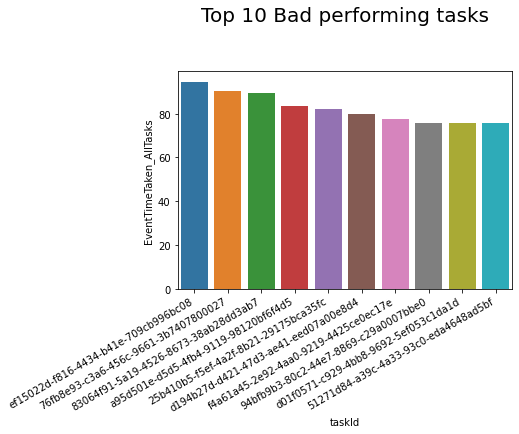

In [368]:
#Displaying the TaskIds based on the time taken to perform a event and sorted it in descending order to predict the top 10 bad performing tasks
TaskPerformanceTable_plot=TaskPerformanceTable.sort_values(by='EventTimeTaken_AllTasks',ascending=False).reset_index(drop=True)
TaskPerformanceTable_plot["taskId"] = TaskPerformanceTable_plot["taskId"].apply(lambda x: str(x))
TaskPerformanceTable_plot=TaskPerformanceTable_plot.head(10)
TaskPerf=sns.barplot(data=TaskPerformanceTable_plot, x="taskId", y="EventTimeTaken_AllTasks")
TaskPerf.set_xticklabels(TaskPerf.get_xticklabels(), rotation=30,horizontalalignment='right')
plt.title("Top 10 Bad performing tasks\n\n", size=20 )
plt.show()

In [360]:
TaskPerformanceTable_plot

,taskId,EventTimeTaken_AllTasks,EventTimeTaken_TotalRender
0,bb205a5e-251e-4349-b8b0-3402a57e357e,24.095,23.371
1,654165fc-7fe5-4bd6-b0ba-557e3545c2e5,24.113,23.380
2,4573fe4d-88dd-4913-b8ab-41ae85bf038a,24.143,23.429
3,0849dfbf-51a2-43d3-b0e4-bfa11f830010,24.148,23.434
4,4f258d1b-8fab-40af-bc9d-66aa3384545e,24.156,23.418
5,6b265761-986f-4c29-aa48-277aa6b50353,24.169,23.456
6,1f85662d-52c0-47b1-9884-e5559d3bd075,24.184,23.463
7,7876bb78-e3eb-43e4-8b2b-fac1c2afb89d,24.200,23.480
8,e6ba0ea2-e511-43be-b911-748581298427,24.202,23.440
9,e967d147-1a46-471f-95cf-72395bbc365d,24.224,23.505


In [364]:
HostPerformanceTable =CheckPointTBL.groupby(by=['hostname'], as_index=False).mean()
HostPerformanceTable

,hostname,EventTimeTaken
0,04dc4e9647154250beeee51b866b0715000000,17.936384
1,04dc4e9647154250beeee51b866b0715000001,18.473380
2,04dc4e9647154250beeee51b866b0715000002,16.302615
3,04dc4e9647154250beeee51b866b0715000003,16.524806
4,04dc4e9647154250beeee51b866b0715000004,18.583390
...,...,...
1019,e7adc42d28814e518e9601ac2329c513000019,18.281344
1020,e7adc42d28814e518e9601ac2329c51300001A,16.304391
1021,e7adc42d28814e518e9601ac2329c51300001B,18.283780
1022,e7adc42d28814e518e9601ac2329c51300001C,18.174616


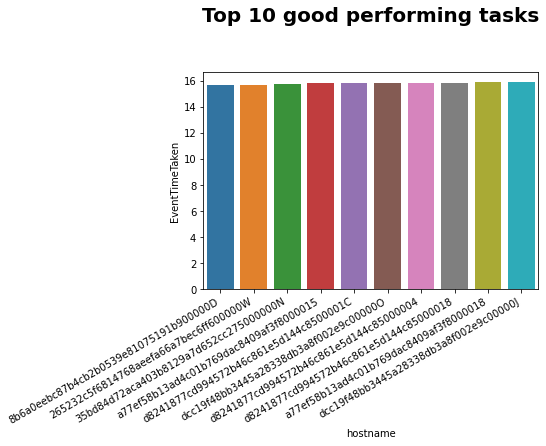

In [437]:
#Displaying the hostname based on the time taken to perform a event and sorted it in ascending order to predict the top 10 good performing tasks

HostPerformanceTable_plot=HostPerformanceTable.sort_values(by='EventTimeTaken',ascending=True).reset_index(drop=True)
HostPerformanceTable_plot["hostname"] = HostPerformanceTable_plot["hostname"].apply(lambda x: str(x))
HostPerformanceTable_plot=HostPerformanceTable_plot.head(10)
HostPerf=sns.barplot(data=HostPerformanceTable_plot, x="hostname", y="EventTimeTaken")
HostPerf.set_xticklabels(HostPerf.get_xticklabels(), rotation=30,horizontalalignment='right')
plt.title("Top 10 good performing tasks\n\n", size=20,fontweight='bold' )
plt.show()

In [ ]:
HostPerformanceTable_plot=HostPerformanceTable.sort_values(by='EventTimeTaken',ascending=False).reset_index(drop=True)
pltbarHostPerformanceTable_plot

In [311]:
GPUPerformanceTable = GPU_Data[["hostname","gpuUUID","gpuSerial","powerDrawWatt","gpuTempC","gpuUtilPerc","gpuMemUtilPerc"]].groupby(by=["hostname","gpuUUID","gpuSerial"], as_index=False).mean()
PerformanceTable = pd.merge(HostPerformanceTable,GPUPerformanceTable,on='hostname')
PerformanceTable

,hostname,EventTimeTaken,gpuUUID,gpuSerial,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,04dc4e9647154250beeee51b866b0715000000,17.936384,GPU-a1119ee9-9cd1-919f-a479-b902142c717d,323217056165,95.868947,43.525333,63.602667,35.876000
1,04dc4e9647154250beeee51b866b0715000001,18.473380,GPU-3dc1601f-0e52-2e31-6b8d-8537d356b84d,323617042956,91.813693,40.992000,64.630000,35.510000
2,04dc4e9647154250beeee51b866b0715000002,16.302615,GPU-e2deaca4-3041-9bbd-b6ac-6d36e09ab116,323617021222,82.537798,38.048193,61.548862,30.505355
3,04dc4e9647154250beeee51b866b0715000003,16.524806,GPU-173a16e7-07e7-3677-b499-9e20353f81a3,323617021168,86.558581,41.576282,60.127249,29.832778
4,04dc4e9647154250beeee51b866b0715000004,18.583390,GPU-c1bb7aec-1afc-3226-db53-58f077365bea,323217056664,94.292392,39.742838,64.545636,35.549634
...,...,...,...,...,...,...,...,...
1019,e7adc42d28814e518e9601ac2329c513000019,18.281344,GPU-53f2e984-36f3-a70f-0944-752868d6a833,320118119210,89.386562,39.095270,64.512325,36.449034
1020,e7adc42d28814e518e9601ac2329c51300001A,16.304391,GPU-05e3f5b6-553b-1a37-bf7a-271c5b999a64,325117063265,82.943504,37.712858,61.762825,30.990007
1021,e7adc42d28814e518e9601ac2329c51300001B,18.283780,GPU-8646ce3a-be99-02fa-a138-dafee7ea3cf2,325017048638,88.354997,38.569046,63.919947,35.593062
1022,e7adc42d28814e518e9601ac2329c51300001C,18.174616,GPU-b0b09148-0762-390d-08d6-93c1a5ccd768,325117173230,88.411319,37.205863,64.930047,36.289141


In [316]:
TaskXYPerformanceTable =  pd.merge(Task_Data,TaskPerformanceTable,on='taskId')
TaskXYPerformanceTable = TaskXYPerformanceTable.drop(columns=['taskId','jobId'])
TaskXYPerformanceTable.sort_values(by=['x','y'], inplace=True)
TaskXYPerformanceTable=TaskXYPerformanceTable.reset_index(drop=True)

In [318]:
TaskXYPerformanceTable

,x,y,level,EventTimeTaken_AllTasks,EventTimeTaken_TotalRender
0,0,0,12,25.336,24.627
1,0,0,4,53.428,52.182
2,0,0,8,44.601,43.853
3,0,1,12,43.979,43.248
4,0,1,8,25.552,24.810
...,...,...,...,...,...
65788,255,251,12,53.228,52.156
65789,255,252,12,45.252,44.247
65790,255,253,12,44.069,43.220
65791,255,254,12,57.269,56.228


In [319]:
TaskXYPerformanceTable_12=TaskXYPerformanceTable[TaskXYPerformanceTable['level']==12].reset_index(drop=True)
TaskXYPerformanceTable_8=TaskXYPerformanceTable[TaskXYPerformanceTable['level']==8].reset_index(drop=True)
TaskXYPerformanceTable_4=TaskXYPerformanceTable[TaskXYPerformanceTable['level']==4].reset_index(drop=True)

In [320]:
EventTimeTakenTable_NotTR = CheckPointTBL[CheckPointTBL['eventName']!='TotalRender'].groupby(['eventName'],as_index=False).sum()
EventTimeTakenTable_TR = CheckPointTBL.groupby(['eventName'],as_index=False).sum()
EventTimeTakenTable_NotTR=EventTimeTakenTable_NotTR.sort_values(by=['EventTimeTaken'],ascending=False)
EventTimeTakenTable_TR=EventTimeTakenTable_TR.sort_values(by=['EventTimeTaken'],ascending=False)

In [321]:
EventTimeTakenTable_NotTR

,eventName,EventTimeTaken
0,Render,2711212.389
3,Uploading,91691.791
2,Tiling,64030.222
1,Saving Config,162.921


In [322]:
TaskXYPerformanceTable_12

,x,y,level,EventTimeTaken_AllTasks,EventTimeTaken_TotalRender
0,0,0,12,25.336,24.627
1,0,1,12,43.979,43.248
2,0,2,12,25.138,24.413
3,0,3,12,45.179,44.470
4,0,4,12,24.795,24.060
...,...,...,...,...,...
65531,255,251,12,53.228,52.156
65532,255,252,12,45.252,44.247
65533,255,253,12,44.069,43.220
65534,255,254,12,57.269,56.228


### Exploratory Data Analysis

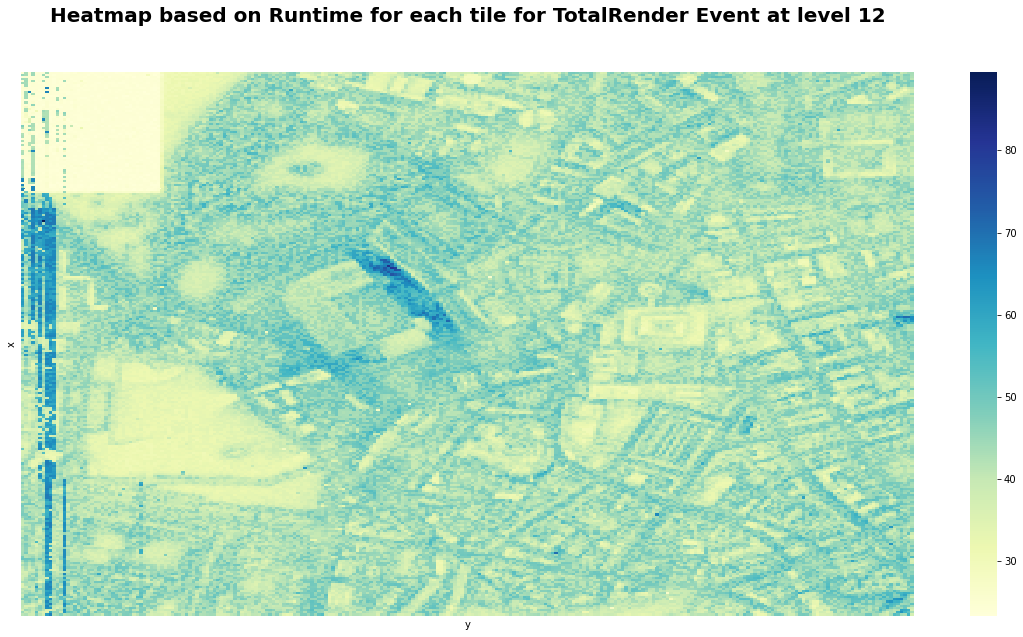

In [323]:
#Heatmap 
fig, ax = plt.subplots(figsize=(20,10))
glue = TaskXYPerformanceTable_12[["x","y","EventTimeTaken_TotalRender"]].pivot("x", "y", "EventTimeTaken_TotalRender")
ax = sns.heatmap(glue, cmap='YlGnBu', annot=False, xticklabels=False, yticklabels=False)
plt.title("Heatmap based on Runtime for each tile for TotalRender Event at level 12\n\n", size=20,fontweight='bold' )
plt.show()

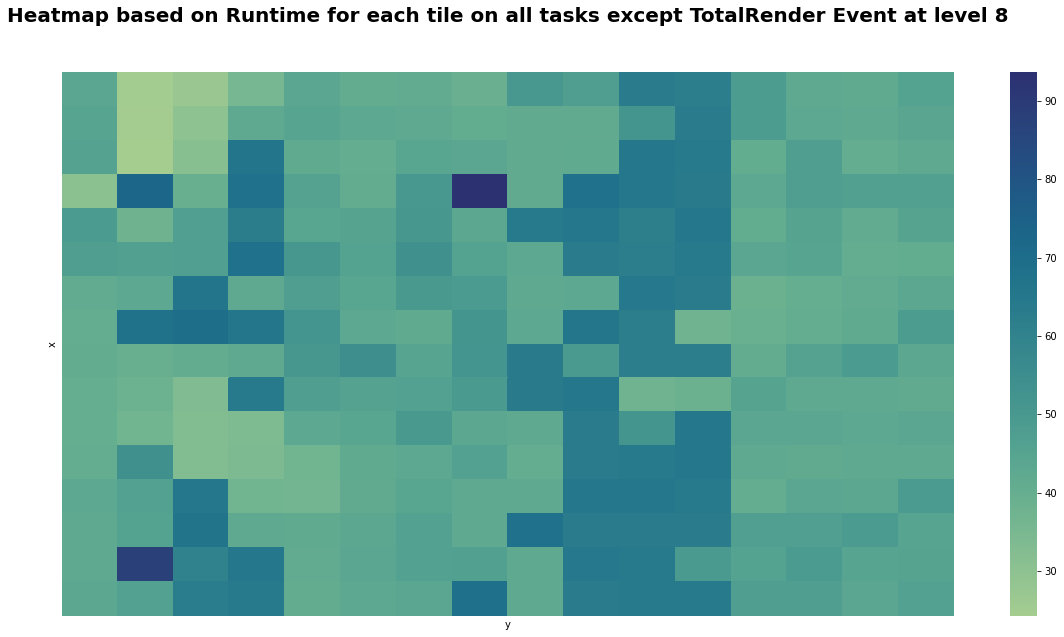

In [324]:
#Heatmap for each tile on all tasks in events except TotalRender Event
fig, ax = plt.subplots(figsize=(20,10))
glue = TaskXYPerformanceTable_8[["x","y","EventTimeTaken_TotalRender"]].pivot("x", "y", "EventTimeTaken_TotalRender")
ax = sns.heatmap(glue, cmap='crest',annot=False, xticklabels=False, yticklabels=False)
plt.title("Heatmap based on Runtime for each tile on all tasks except TotalRender Event at level 8\n\n", size=20,fontweight='bold' )
plt.show()

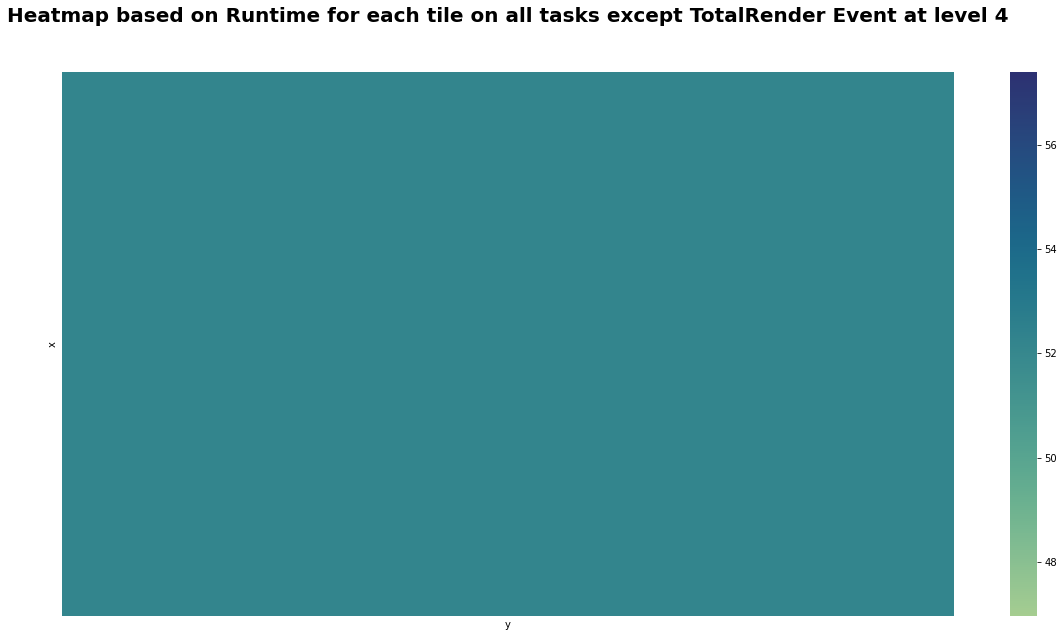

In [325]:
#Heatmap for each tile on all tasks in events except TotalRender Event
fig, ax = plt.subplots(figsize=(20,10))
glue = TaskXYPerformanceTable_4[["x","y","EventTimeTaken_TotalRender"]].pivot("x", "y", "EventTimeTaken_TotalRender")
ax = sns.heatmap(glue, cmap='crest',annot=False, xticklabels=False, yticklabels=False)
plt.title("Heatmap based on Runtime for each tile on all tasks except TotalRender Event at level 4\n\n", size=20,fontweight='bold' )
plt.show()

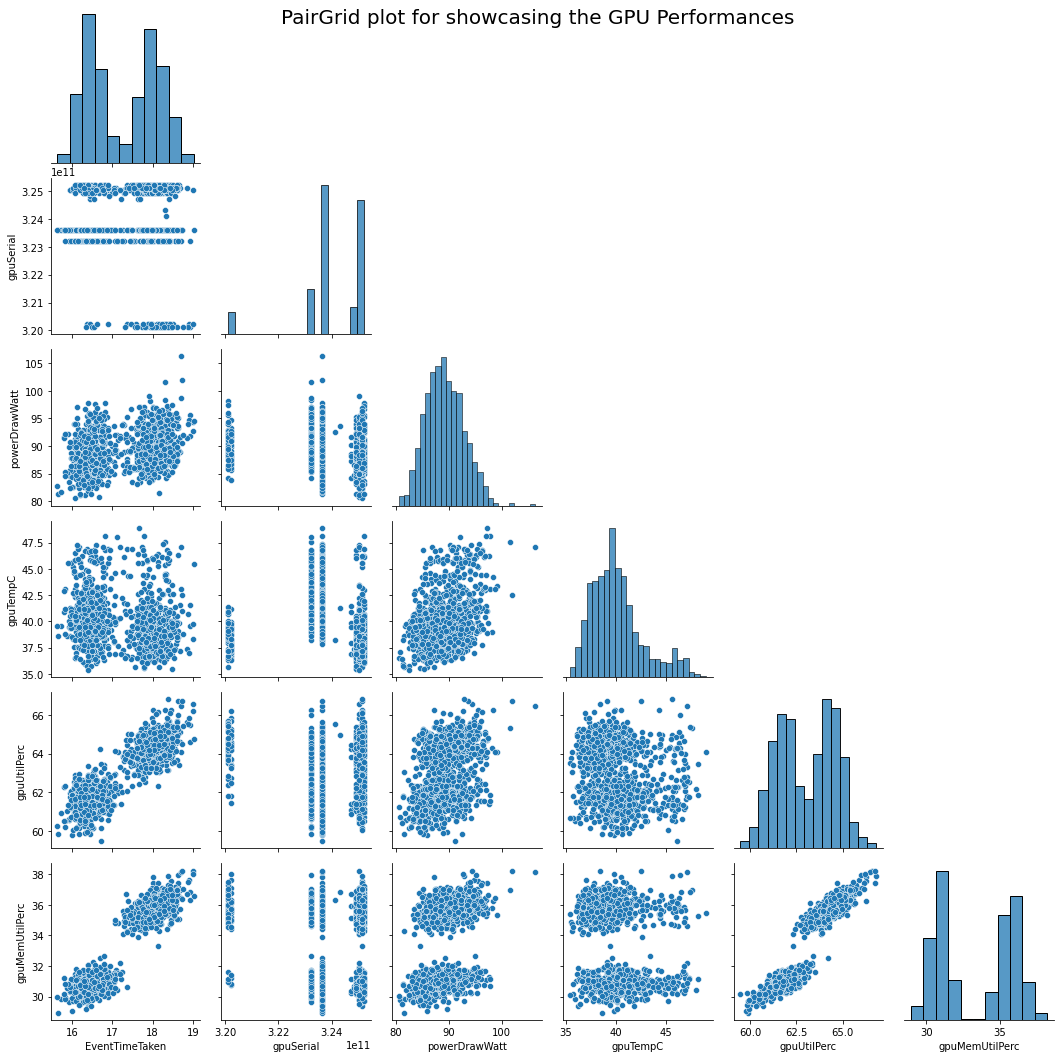

In [326]:
#GPU Table Pair plot matrix 
%matplotlib inline
g = sns.PairGrid(PerformanceTable, diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)
plt.suptitle('PairGrid plot for showcasing the GPU Performances', fontsize = 20)
plt.show()

## Questionnaire

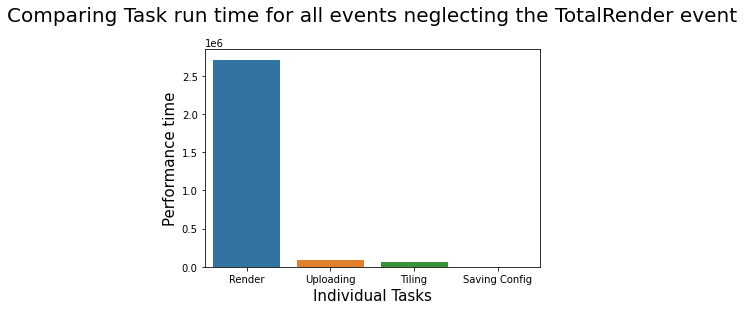

In [448]:
#Comparing Task run time for all events neglecting the TotalRender event
Bar_Task=sns.barplot(data=EventTimeTakenTable_NotTR, x="eventName", y="EventTimeTaken")
Bar_Task.bar_label(Bar_Task.containers[0])
plt.title("Comparing Task run time for all events neglecting the TotalRender event\n",size=20)
plt.xlabel('Individual Tasks',size=15)
plt.ylabel('Performance time',size=15)
plt.show()

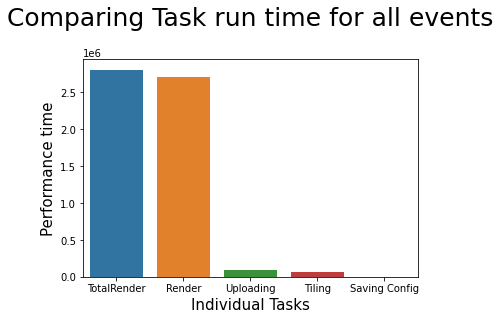

In [449]:
#Comparing Task run time for all the events
%matplotlib inline
Bar_Task_1=sns.barplot(data=EventTimeTakenTable_TR, x="eventName", y="EventTimeTaken")
Bar_Task_1.bar_label(Bar_Task.containers[0])
plt.title("Comparing Task run time for all events\n",size=25)
plt.xlabel('Individual Tasks',size=15)
plt.ylabel('Performance time',size=15)
plt.show()

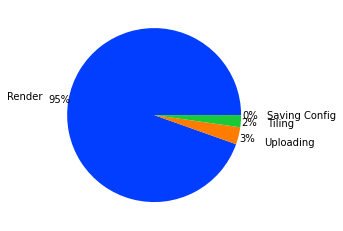

In [329]:
#Pie chart Comparing Task run time for all the events
%matplotlib inline
palette_color = sns.color_palette('bright')
plt.pie(EventTimeTakenTable_NotTR['EventTimeTaken'],colors=palette_color, labels=EventTimeTakenTable_NotTR['eventName'], autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.3)  
# displaying chart
plt.show()

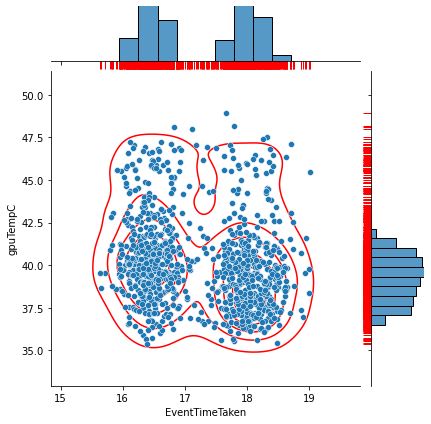

In [330]:
#Joint plot showing the comparison of GPU temperature with the Time taken by the respective event.
Obj1 = sns.jointplot(x='EventTimeTaken', y='gpuTempC', data=PerformanceTable)
# Obj1.fig.suptitle("GPU Temperature and Performance time comparison using Scatterplot and histogram plot\n\n\n")
# Obj1.ax_joint.set_xlabel('Performance time')
# Obj1.ax_joint.set_ylabel('GPU Temperature')

Obj1.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
Obj1.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

Text(0.5, 0.98, 'Comparison of Average Power draw with the calculated Performance time')

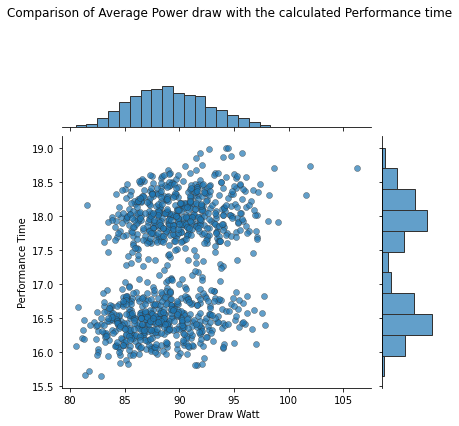

In [331]:
#JointGrid plot for comparing the calculated performance time with the Average power draw taken
gpu = sns.JointGrid(data=PerformanceTable, x="powerDrawWatt", y="EventTimeTaken")
gpu.plot(sns.scatterplot, sns.histplot,alpha=.7, edgecolor=".2")
gpu.set_axis_labels(xlabel='Power Draw Watt', ylabel='Performance Time')
gpu.fig.subplots_adjust(top=.8)
gpu.fig.suptitle('Comparison of Average Power draw with the calculated Performance time')


In [332]:
#GPU performance table showing top 10 GPU Serial codes and its corresponding execution 

PerformanceTable_GPU=PerformanceTable[['hostname','EventTimeTaken','gpuUUID','gpuSerial']].groupby(by=['gpuSerial'],as_index=False).mean()
PerformanceTable_GPU=PerformanceTable_GPU.sort_values(by=['EventTimeTaken'],ascending=False).reset_index(drop=True)
PerformanceTable_GPU["gpuSerial"] = PerformanceTable_GPU["gpuSerial"].apply(lambda x: str(x))
PerformanceTable_GPU=PerformanceTable_GPU.head(10)
PerformanceTable_GPU

,gpuSerial,EventTimeTaken
0,323617042821,19.013569
1,325017018645,19.001125
2,320218055378,18.991756
3,323217048793,18.938176
4,320118118728,18.933481
5,320218055639,18.893278
6,320118119009,18.868488
7,325117172889,18.861085
8,320118118802,18.757590
9,323617021202,18.736797


<Figure size 432x288 with 0 Axes>

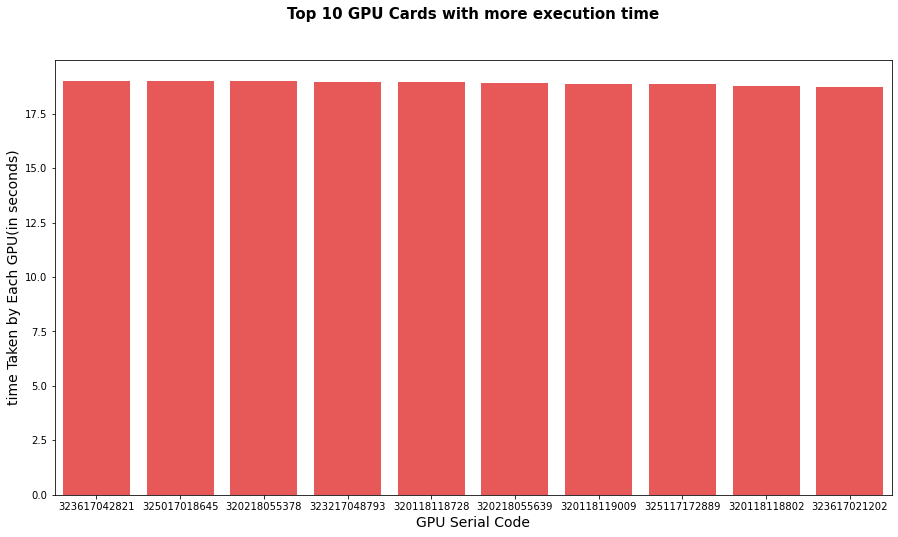

In [333]:
#Bar plot which clearly shows us the top 10 GPU's which has consumed more time while executing
plt.clf()
plt.subplots(figsize=(15,8))
GPU=sns.barplot(data=PerformanceTable_GPU, x="gpuSerial", y="EventTimeTaken",color = '#FF4040')
plt.title("Top 10 GPU Cards with more execution time\n\n", size=15,fontweight='bold')
plt.xlabel("GPU Serial Code", size = 14)
plt.ylabel("time Taken by Each GPU(in seconds)", size = 14)
plt.show()

In [376]:
CheckPointTBL

,timestamp_EventStartTime,hostname,eventName,jobId,taskId,timestamp_EventStopTime,EventTimeTaken
190313,2018-11-08 08:16:43.895000+00:00,04dc4e9647154250beeee51b866b0715000000,Tiling,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,a164499b-4bb8-42b7-9dc0-cf049b62731e,2018-11-08 08:16:44.897000+00:00,1.002
283469,2018-11-08 07:47:22.860000+00:00,04dc4e9647154250beeee51b866b0715000000,Saving Config,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ffd69831-0ba4-457b-b8a8-e37c49779d94,2018-11-08 07:47:22.863000+00:00,0.003
283468,2018-11-08 07:47:22.863000+00:00,04dc4e9647154250beeee51b866b0715000000,Render,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ffd69831-0ba4-457b-b8a8-e37c49779d94,2018-11-08 07:47:55.554000+00:00,32.691
100120,2018-11-08 08:06:41.657000+00:00,04dc4e9647154250beeee51b866b0715000000,Saving Config,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,856b1c9e-8050-4648-b80e-172899cc586d,2018-11-08 08:06:41.659000+00:00,0.002
100049,2018-11-08 08:06:41.657000+00:00,04dc4e9647154250beeee51b866b0715000000,TotalRender,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,856b1c9e-8050-4648-b80e-172899cc586d,2018-11-08 08:07:26.785000+00:00,45.128
...,...,...,...,...,...,...,...
218933,2018-11-08 07:43:33.460000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Render,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,de595141-d9c8-4e35-ac71-f14d1c9ebe80,2018-11-08 07:44:20.792000+00:00,47.332
218938,2018-11-08 07:43:30.381000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Uploading,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,472afcae-6f17-43c1-8f1c-8df4116cfed7,2018-11-08 07:43:31.506000+00:00,1.125
277668,2018-11-08 08:00:45.782000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Uploading,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,4001ba74-396f-4c68-80cb-165723760b6a,2018-11-08 08:00:46.780000+00:00,0.998
194757,2018-11-08 08:19:59.217000+00:00,e7adc42d28814e518e9601ac2329c51300001D,Render,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,4b2777ea-b877-498f-bace-43d867a86046,2018-11-08 08:20:33.780000+00:00,34.563


In [401]:
DelayTable=CheckPointTBL[['hostname','eventName','taskId','timestamp_EventStartTime','timestamp_EventStopTime','jobId']].groupby(by=['hostname','taskId'],as_index=False).agg({'timestamp_EventStartTime':min,'timestamp_EventStopTime':max})
DelayTable.sort_values(by=['hostname','timestamp_EventStartTime'],inplace=True)


In [402]:
SingleCheckTable=DelayTable[DelayTable['hostname']=='04dc4e9647154250beeee51b866b0715000000']

In [414]:
SingleCheckTable=SingleCheckTable.reset_index(drop=True)

In [403]:
DelayTable

,hostname,taskId,timestamp_EventStartTime,timestamp_EventStopTime
0,04dc4e9647154250beeee51b866b0715000000,00390eee-c26c-41da-a02d-556bb7fcac67,2018-11-08 07:41:45.459000+00:00,2018-11-08 07:42:11.268000+00:00
53,04dc4e9647154250beeee51b866b0715000000,dbc599f6-694b-46c4-a864-e09ab881af37,2018-11-08 07:42:14.797000+00:00,2018-11-08 07:42:55.116000+00:00
3,04dc4e9647154250beeee51b866b0715000000,0ad8d29d-d30c-48c9-bd0a-fbea985464b2,2018-11-08 07:42:58.327000+00:00,2018-11-08 07:43:41.318000+00:00
27,04dc4e9647154250beeee51b866b0715000000,52881801-4d75-4ada-a118-682aa1d5ddf9,2018-11-08 07:43:43.296000+00:00,2018-11-08 07:44:07.980000+00:00
30,04dc4e9647154250beeee51b866b0715000000,5c14d761-26af-4602-a51d-6378a4ad7c24,2018-11-08 07:44:11.088000+00:00,2018-11-08 07:44:57.193000+00:00
...,...,...,...,...
65762,e7adc42d28814e518e9601ac2329c51300001D,79da2433-c40d-4353-9e2d-88aab362066f,2018-11-08 08:25:15.358000+00:00,2018-11-08 08:26:02.335000+00:00
65739,e7adc42d28814e518e9601ac2329c51300001D,25b6e321-73c0-4547-b6e8-454927e15ae5,2018-11-08 08:26:04.809000+00:00,2018-11-08 08:26:56.736000+00:00
65754,e7adc42d28814e518e9601ac2329c51300001D,5ea81ba4-f9b6-47c0-8fa8-149df0488d9b,2018-11-08 08:26:59.250000+00:00,2018-11-08 08:27:57.006000+00:00
65761,e7adc42d28814e518e9601ac2329c51300001D,7898c36a-1c41-442e-826d-b8884880dc2a,2018-11-08 08:27:58.303000+00:00,2018-11-08 08:28:34.820000+00:00


In [400]:
#Code to Calculate delay time for complete data
DelayTable=DelayTable.reset_index(drop=True)
InitialHostname=str(DelayTable['hostname'][0])
DelayTable['DelayedTime']=0.0
i=0
while(i<len(DelayTable)-1):
    if(InitialHostname==DelayTable['hostname'][i]):
        temp=DelayTable['timestamp_EventStartTime'][i+1]-DelayTable['timestamp_EventStopTime'][i]
        DelayTable['DelayedTime'][i]=temp.total_seconds()
        i+=1
    else:
        DelayTable['DelayedTime'][i-1]=0.0
        temp=DelayTable['timestamp_EventStartTime'][i+1]-DelayTable['timestamp_EventStopTime'][i]
        DelayTable['DelayedTime'][i]=temp.total_seconds()
        InitialHostname=DelayTable['hostname'][i]
        i+=1
    
        

In [417]:
#Code to calculate Delay time for a single hostname
t=[]
i=0
while(i<len(SingleCheckTable)):
    if(i+1>=len(SingleCheckTable)):
        break
    k=abs(SingleCheckTable['timestamp_EventStartTime'][i+1]-SingleCheckTable['timestamp_EventStopTime'][i])
    t.append({'DelayTime': k.total_seconds(), 'Hostname': SingleCheckTable['hostname'][i],'taskId': SingleCheckTable['taskId'][i]})
    #print('\n',t)
    #t.append(k,results_table_123['hostname'][i])
    i+=1
df = pd.DataFrame (t)

In [418]:
df

,DelayTime,Hostname,taskId
0,3.529,04dc4e9647154250beeee51b866b0715000000,00390eee-c26c-41da-a02d-556bb7fcac67
1,3.211,04dc4e9647154250beeee51b866b0715000000,dbc599f6-694b-46c4-a864-e09ab881af37
2,1.978,04dc4e9647154250beeee51b866b0715000000,0ad8d29d-d30c-48c9-bd0a-fbea985464b2
3,3.108,04dc4e9647154250beeee51b866b0715000000,52881801-4d75-4ada-a118-682aa1d5ddf9
4,2.980,04dc4e9647154250beeee51b866b0715000000,5c14d761-26af-4602-a51d-6378a4ad7c24
5,2.951,04dc4e9647154250beeee51b866b0715000000,fa8d5709-ffb6-4a8b-bd73-0076c1654d49
6,2.557,04dc4e9647154250beeee51b866b0715000000,0ebfe158-0c86-4cde-8742-20d13cc4076b
7,2.206,04dc4e9647154250beeee51b866b0715000000,403c1ca4-f5d3-4831-8a66-0f8be10f5aeb
8,3.118,04dc4e9647154250beeee51b866b0715000000,ffd69831-0ba4-457b-b8a8-e37c49779d94
9,2.730,04dc4e9647154250beeee51b866b0715000000,70a9ab55-b17f-4df6-82ef-146425d7bbfa
